# Optimization using Auto-Differentiation

Purpose: To test the AD code in simple gradient-based optimization scenarios.

In [20]:
import numpy as np
from joAD import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Scalar function to minimize

In [21]:
def f(x):
    return 8*x**4 + 4*x**3 - 28*x**2 - 24*x
def f_primed(x):
    return 32*x**3 + 12*x**2 - 56*x - 24

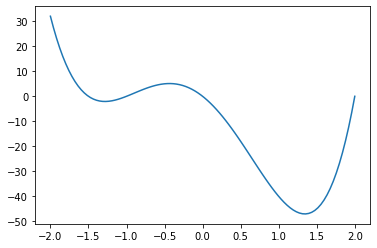

In [22]:
xx = np.linspace(-2,2,100)
yy = f(xx)
plt.figure()
plt.plot(xx,yy);

## Set up computation

In [23]:
# x
X = MyVar(0.0)

# Coefficients
A = MyVar(8.0)
B = MyVar(4.0)
C = MyVar(-28.0)
D = MyVar(-24.0)

In [24]:
# Build the formula using my functions from the joAD module
term1 = Mul(A,Power(X,4))
term2 = Mul(B,Power(X,3))
term3 = Mul(C,Power(X,2))
term4 = Mul(D,X)
F = Plus( Plus(term1, term2), Plus(term3, term4) )

In [26]:
# Display the expression
F

((8.0*(0.0)**4+4.0*(0.0)**3)+(-28.0*(0.0)**2+-24.0*0.0))

## Evaluate the expression

In [27]:
F.val  # for the given X-value as it was set up

0.0

In [28]:
# Can also use functional notation
F()

0.0

In [29]:
# Let's choose a different x-value
X.Set(1.)
F.Evaluate()  # Causes recomputation of the whole graph

-40.0

In [30]:
F

((8.0*(1.0)**4+4.0*(1.0)**3)+(-28.0*(1.0)**2+-24.0*1.0))

In [31]:
term3

-28.0*(1.0)**2

## Gradients

In [32]:
F.ZeroGrad()   # sets all gradients to zero (duh)
F.Backward()   # projects the derivatives down through the graph
X.grad

-36.0

In [33]:
f_primed(X.val)

-36.0

In [34]:
X.Set(-2)
F.Evaluate()
F.ZeroGrad()
F.Backward()
print(X.grad)
print(f_primed(X.val))

-120.0
-120


## Optimization

In [35]:
x = -0.5     # initial guess at root

kappa = 0.01  # gradient step multiplier
n_iters = 20  # number of gradient-descent steps

xh = []  # for plotting
fh = []

for n in range(n_iters):
    X.Set(x)
    F.Evaluate()

    xh.append(X.val)
    fh.append(F.val)

    # Compute gradients
    F.ZeroGrad()
    F.Backward()
    
    # gradient step
    x -= kappa*X.grad
    
    print(X.val, F.val)
    

-0.5 5.0
-0.53 4.890530479999999
-0.57286736 4.6694539158929995
-0.632893715517608 4.243441811199271
-0.7142580436623102 3.4821719921558065
-0.8188577710971943 2.2783956297675894
-0.9421800155790306 0.715262005452026
-1.0686848228766612 -0.7772262090211637
-1.1736287741916869 -1.6885363818933712
-1.2388497302701698 -2.0022331636389143
-1.2683520717158823 -2.0615411865021347
-1.2787410254942664 -2.068623667757487
-1.2819470416518044 -2.069289078534384
-1.2828882386607885 -2.069346185748799
-1.2831602153808173 -2.069350948472703
-1.2832384415121871 -2.069351342331089
-1.283260910508917 -2.069351374821789
-1.2832673617933377 -2.0693513775001584
-1.2832692138746684 -2.0693513777209063
-1.283269745566455 -2.0693513777390997


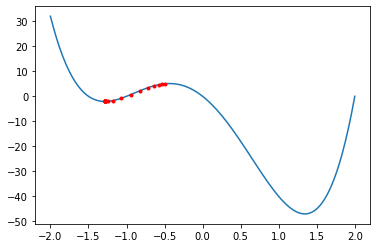

In [36]:
xx = np.linspace(-2,2,100)
yy = f(xx)
plt.figure()
plt.plot(xx,yy);
plt.plot(xh, fh, 'r.');
#plt.savefig('quartic.png', dpi=100);